In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [2]:
df.shape

(1456714, 23)

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [5]:
df.isnull().sum().sum()

187129

In [6]:
df[df["X Coordinate"].isnull() & df["Y Coordinate"].isnull() & df["Latitude"].isnull() & df["Longitude"].isnull() & df["Location"].isnull()].shape
#In 37083 rows we don t have the X Coordinate,Y Coordinate,Latitude,Longitude and Location

(37083, 23)

In [7]:
print('the null values just are the',(37083/1456714)*100,'% of my data.')

the null values just are the 2.5456609876750003 % of my data.


In [8]:
#We can't replace the missing data
#so I'm going to drop this 2.54% of my data
df.dropna(axis=0 , how='any' , inplace= True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.shape

(1418365, 23)

In [11]:
#Drop column Unnamed
df=df.drop('Unnamed: 0',axis=1) 
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 22 columns):
ID                      1418365 non-null int64
Case Number             1418365 non-null object
Date                    1418365 non-null object
Block                   1418365 non-null object
IUCR                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
FBI Code                1418365 non-null object
X Coordinate            1418365 non-null float64
Y Coordinate            1418365 non-null float64
Year                    1418365 non-null int64
Updated On              1

In [13]:
#Convert Date column to Date Time format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [14]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 22 columns):
ID                      1418365 non-null int64
Case Number             1418365 non-null object
Date                    1418365 non-null datetime64[ns]
Block                   1418365 non-null object
IUCR                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
FBI Code                1418365 non-null object
X Coordinate            1418365 non-null float64
Y Coordinate            1418365 non-null float64
Year                    1418365 non-null int64
Updated On       

In [16]:
df["Primary Type"].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [17]:
df["District"].value_counts()

11.0    99950
8.0     94215
6.0     84688
4.0     83568
7.0     82116
25.0    81277
3.0     71554
9.0     69150
12.0    67616
10.0    64735
19.0    64117
5.0     63409
15.0    63130
18.0    61724
1.0     60156
2.0     58670
14.0    50931
16.0    48468
22.0    46213
17.0    40313
24.0    39260
20.0    23078
31.0       26
13.0        1
Name: District, dtype: int64

In [18]:
df["Year"].value_counts()

2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
2017        30
Name: Year, dtype: int64

In [19]:
df["Arrest"].value_counts()

False    1047308
True      371057
Name: Arrest, dtype: int64

In [20]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06
mean,9.574675e+06,1.150282e+03,1.125518e+01,2.285474e+01,3.747455e+01,1.164399e+06,1.885510e+06,2.013851e+03,4.184144e+01,-8.767223e+01
std,8.011218e+05,6.916395e+02,6.904508e+00,1.379378e+01,2.142995e+01,1.843389e+04,3.413940e+04,1.423228e+00,9.399956e-02,6.637181e-02
min,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,8.987180e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152540e+06,1.858752e+06,2.013000e+03,4.176784e+01,-8.771529e+01
50%,9.575732e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166015e+06,1.891485e+06,2.014000e+03,4.185787e+01,-8.766614e+01
75%,1.019113e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176363e+06,1.908687e+06,2.015000e+03,4.190524e+01,-8.762812e+01
max,1.082334e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [21]:
df.describe(include=bool)

,Arrest,Domestic
count,1418365,1418365
unique,2,2
top,False,False
freq,1047308,1203231


In [22]:
df.describe(include=['O'])

,Case Number,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365
unique,1418258,32546,363,33,340,140,26,950,368079
top,HZ140230,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,06,02/04/2016 06:33:39 AM,"(41.883500187, -87.627876698)"
freq,6,3567,132848,321950,147845,325084,321950,906327,2093


In [23]:
df[df["Case Number"] == "HZ140230"]


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7439,22314,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7440,22316,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7441,22317,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7442,22318,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7443,22319,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
1215137,22313,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"


Case number is a unique value,but as we see for the same case number we have 6 rows which means that we have a duplicated rows.

In [24]:
df.drop("ID",axis= 1 , inplace= True)

In [25]:
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [26]:
df=df.drop_duplicates()

In [27]:
df[df["Case Number"] == "HZ140230"]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7439,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"


In [28]:
df.shape

(1418315, 21)

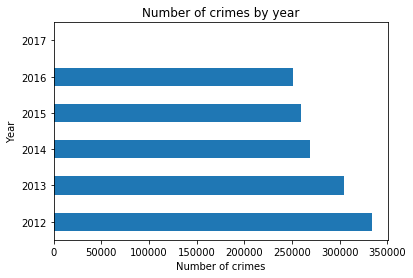

In [29]:
#how the crime numbers in Chicago have been year by year?
df.groupby([df.Year]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Year')
plt.title('Number of crimes by year')
plt.show()

The number of crimes is decreasing.

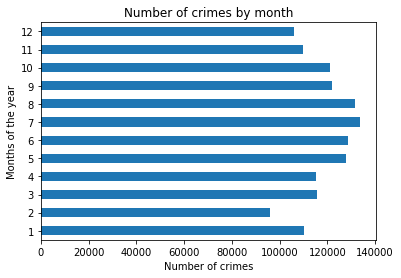

In [30]:
#how the crime numbers in Chicago have been month by month?

df.groupby([df.Date.dt.month]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Months of the year')
plt.title('Number of crimes by month')
plt.show()

In February we have the lowest number of crimes but we can not conclude because February has less number of days than other months.

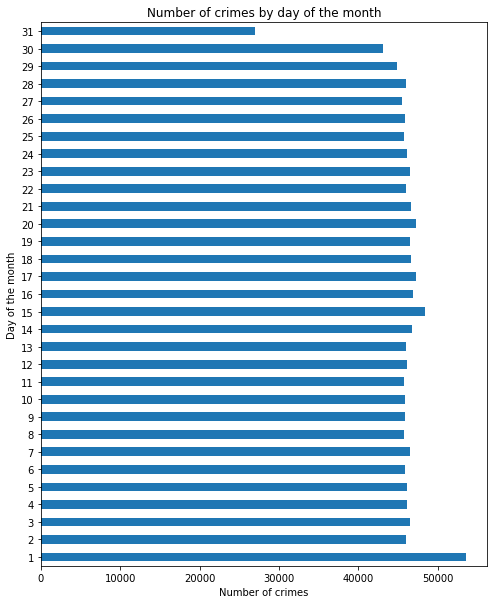

In [31]:
plt.figure(figsize=(8,10))
df.groupby([df.Date.dt.day]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Day of the month')
plt.title('Number of crimes by day of the month')
plt.show()

1st day of the month records most crimes.Also we see that 31st day has least number of crimes, but it can be because day 31 is only present in 7 months of the year and hence will have less crime records than any other day.

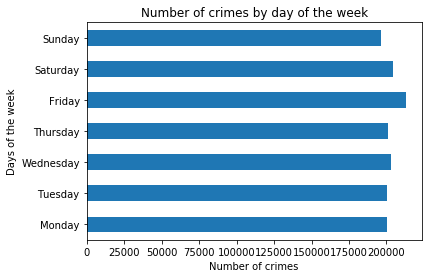

In [32]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.Date.dt.day_name()]).size().reindex(days) .plot(kind='barh')
plt.ylabel('Days of the week')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

More or less each day have similar crime numbers.

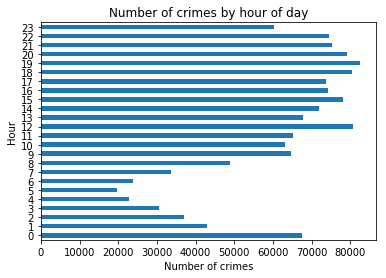

In [33]:
df.groupby([df.Date.dt.hour]).size().plot(kind='barh')
plt.ylabel('Hour')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by hour of day')
plt.show()

In [34]:
d={}
for x in range(24):
    if 5 <= x <= 11:
        d[x]="Morning"
    elif 12<= x <= 17:
        d[x]="Afternoon"
    elif 18<= x <= 22:
        d[x]="Evening"    
    else :
        d[x]="Night"
df["Time slice"]=df.Date.dt.hour.map(d)

df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time slice
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",Night
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Evening
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Night
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Evening
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Evening


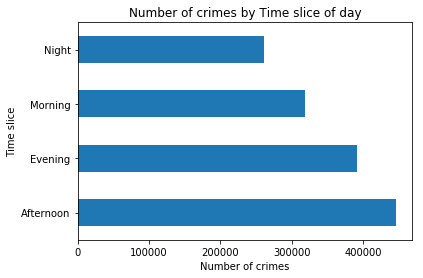

In [35]:
df.groupby([df["Time slice"]]).size().plot(kind='barh')
plt.ylabel('Time slice')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Time slice of day')
plt.show()

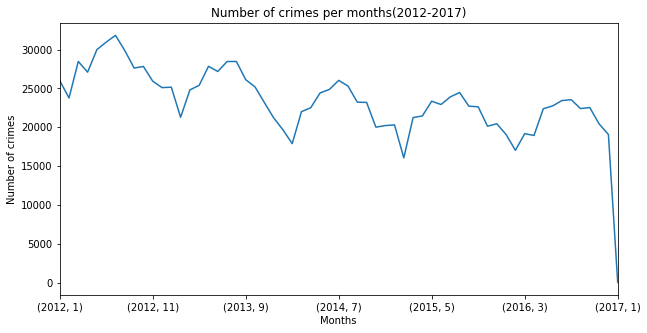

In [36]:
plt.figure(figsize=(10,5))
df.groupby([df["Year"],df.Date.dt.month]).size().plot()
plt.ylabel('Number of crimes')
plt.xlabel('Months')
plt.title('Number of crimes per months(2012-2017)')
plt.show()

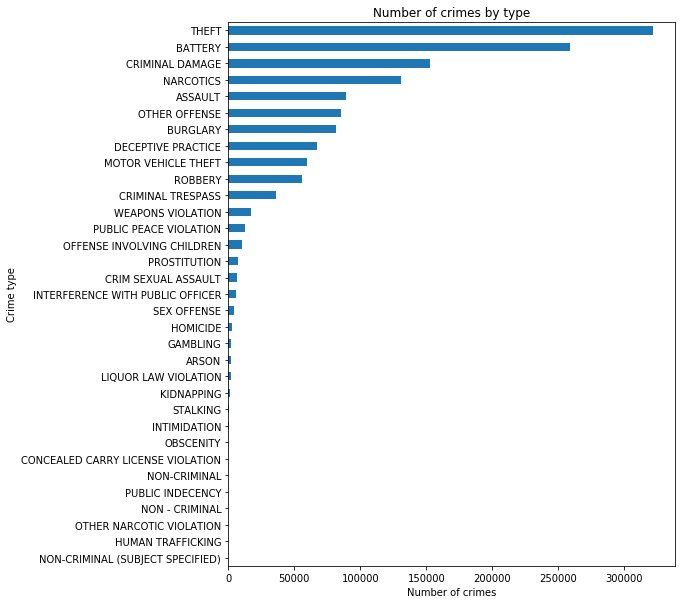

In [37]:
#Different types of crimes in Chicago?
plt.figure(figsize=(8,10))
df.groupby([df["Primary Type"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Crime type')
plt.title('Number of crimes by type')
plt.show()

Theft is the most common crime in Chicago ollowed by Battery  and criminal damage... <br/>
We have 33 crime type but we can remove the data points which recorded a very few cases to reduce the size and complexity of our data.

In [68]:
primary_type=df.groupby([df["Primary Type"]]).size().sort_values(ascending=True)
primary_type=primary_type[-10:]
df["Top_10_primary_type"]=df["Primary Type"].map(lambda x: x if x in primary_type else "other")
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Updated On,Latitude,Longitude,Location,Time slice,Top_10_primary_type,Top_10_location_description,Top_60_location_description,Top_30_location_description,Top_20_location_description
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",Night,BATTERY,APARTMENT,APARTMENT,APARTMENT,APARTMENT
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Evening,BATTERY,RESIDENCE,RESIDENCE,RESIDENCE,RESIDENCE
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Night,other,STREET,STREET,STREET,STREET
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Evening,BATTERY,SIDEWALK,SIDEWALK,SIDEWALK,SIDEWALK
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Evening,THEFT,RESIDENCE,RESIDENCE,RESIDENCE,RESIDENCE


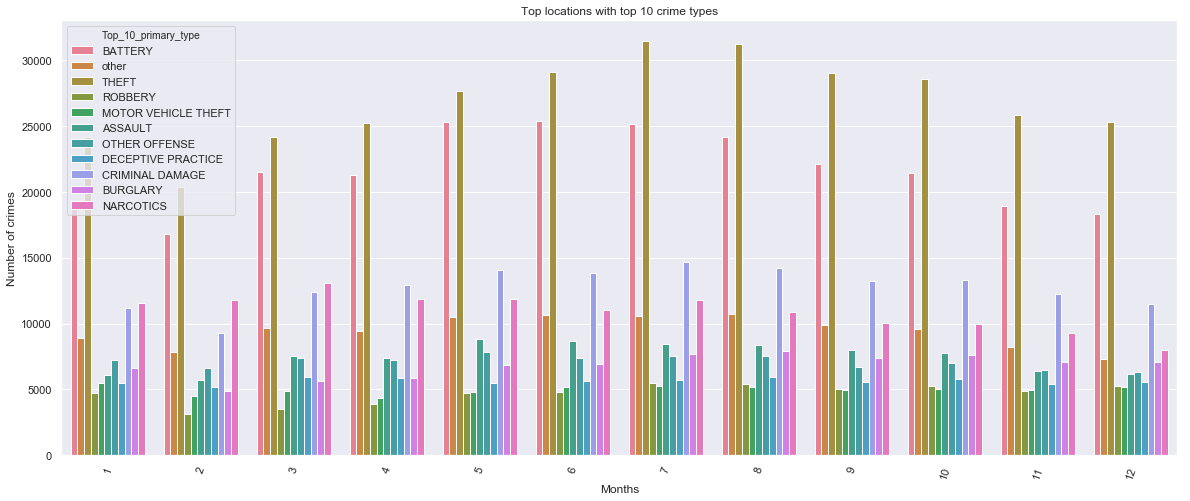

In [71]:
#which is the distribution of top crimes per month
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x=df.Date.dt.month, hue='Top_10_primary_type', data=df,palette="husl")
plt.title("Top locations with top 10 crime types")
plt.xlabel("Months")
plt.ylabel("Number of crimes")

ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

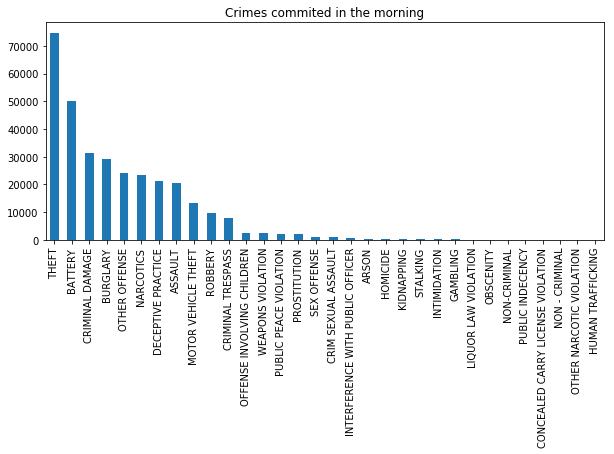

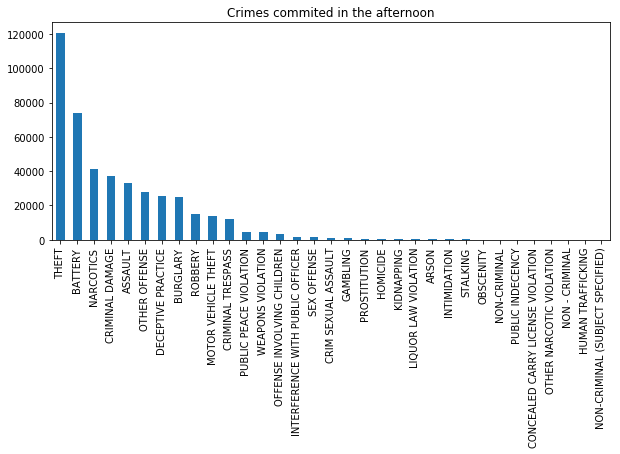

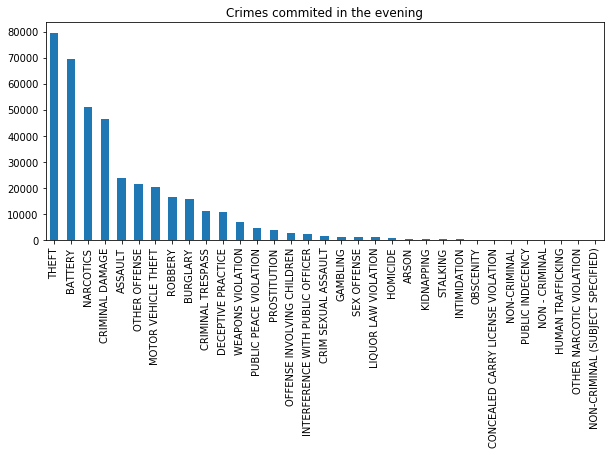

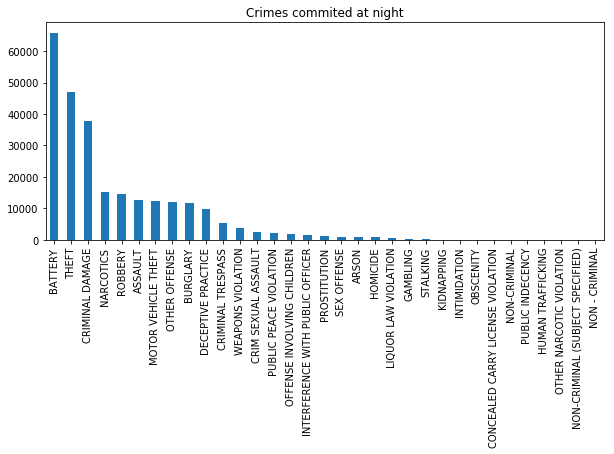

In [38]:
#type of crimes recorded in different time slice?
plt.figure(figsize=(10,4))
df[df["Time slice"] == "Morning"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited in the morning")
plt.show()

plt.figure(figsize=(10,4))
df[df["Time slice"] == "Afternoon"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited in the afternoon")
plt.show()

plt.figure(figsize=(10,4))
df[df["Time slice"] == "Evening"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited in the evening")
plt.show()

plt.figure(figsize=(10,4))
df[df["Time slice"] == "Night"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited at night")
plt.show()

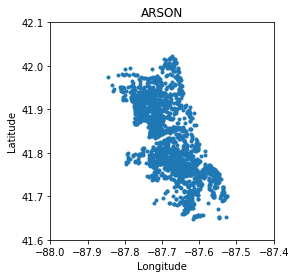

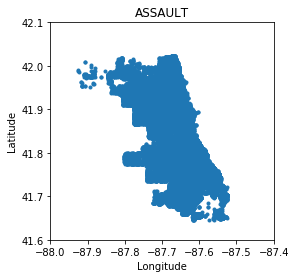

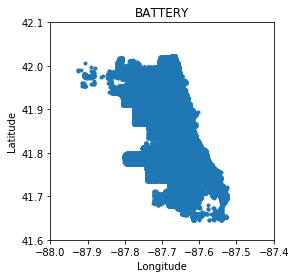

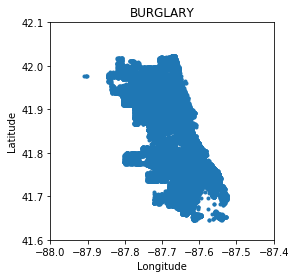

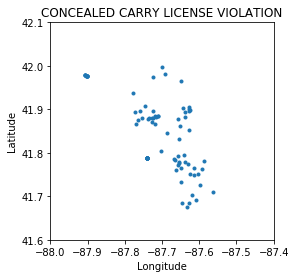

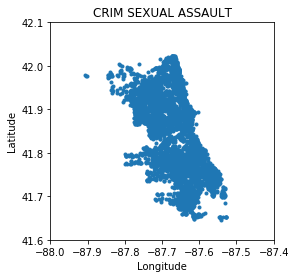

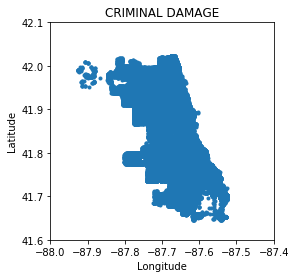

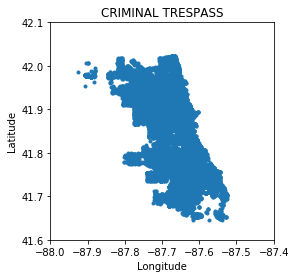

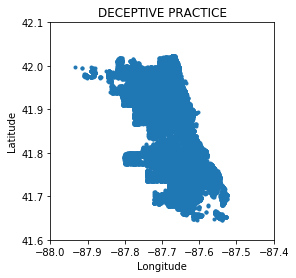

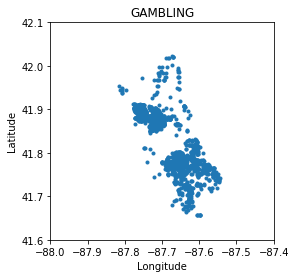

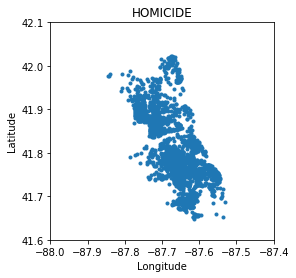

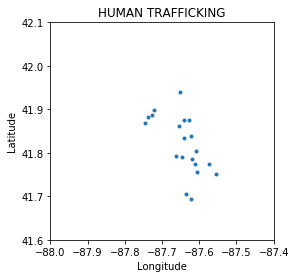

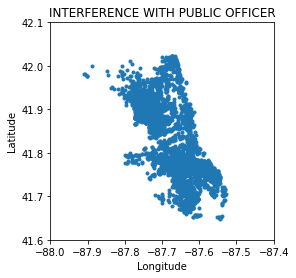

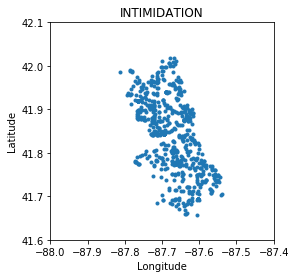

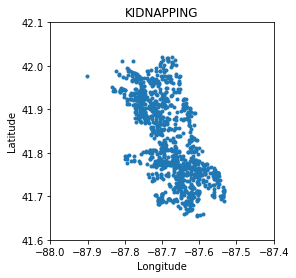

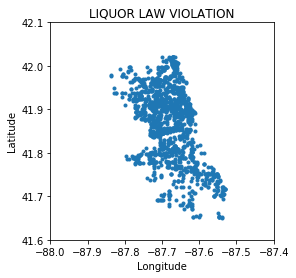

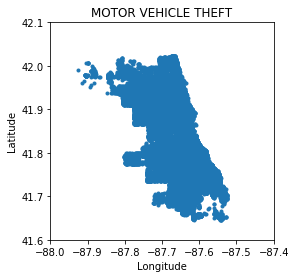

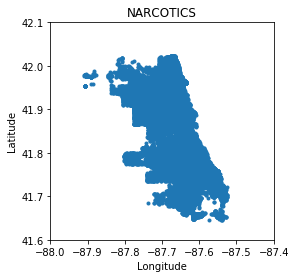

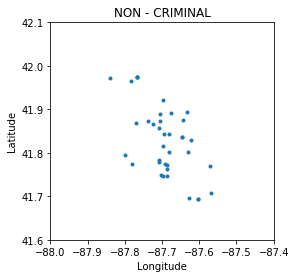

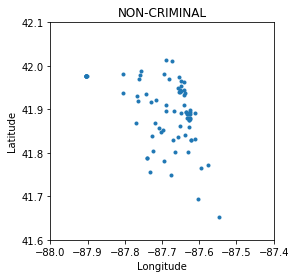

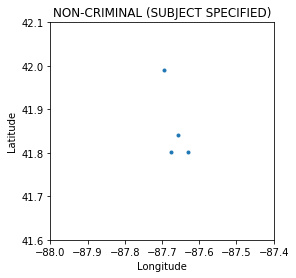

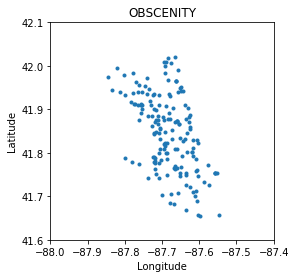

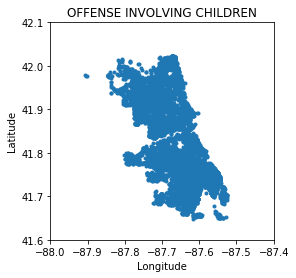

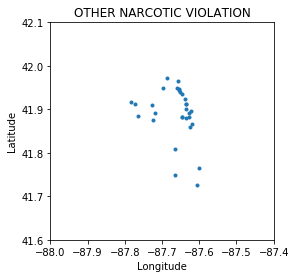

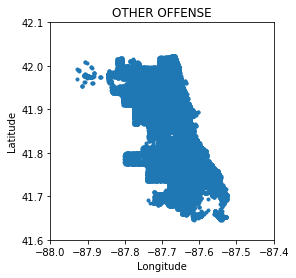

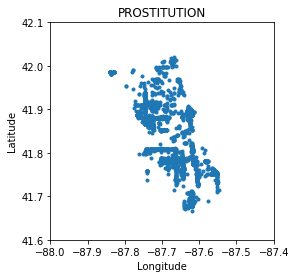

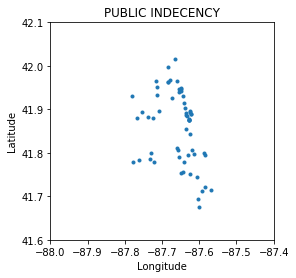

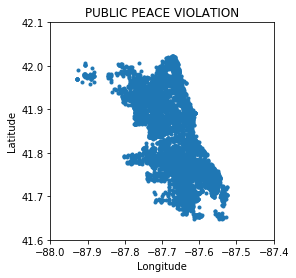

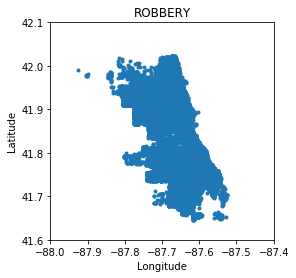

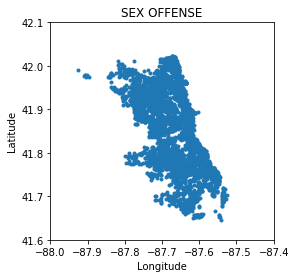

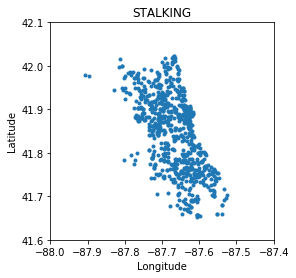

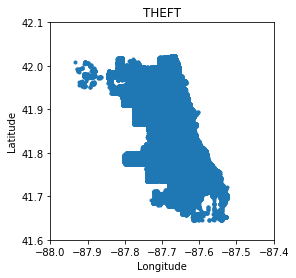

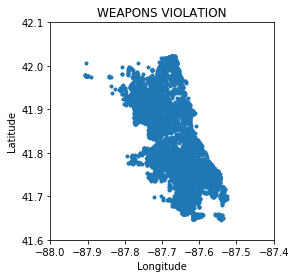

In [41]:
#Which is the distribution of crime types in different locations(latitude and longitude)?
df_primary_type = df.groupby(df['Primary Type'])
df_primary_type = dict(list(df_primary_type))
Keys = list(df_primary_type.keys())
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(df_primary_type[key].Longitude, df_primary_type[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

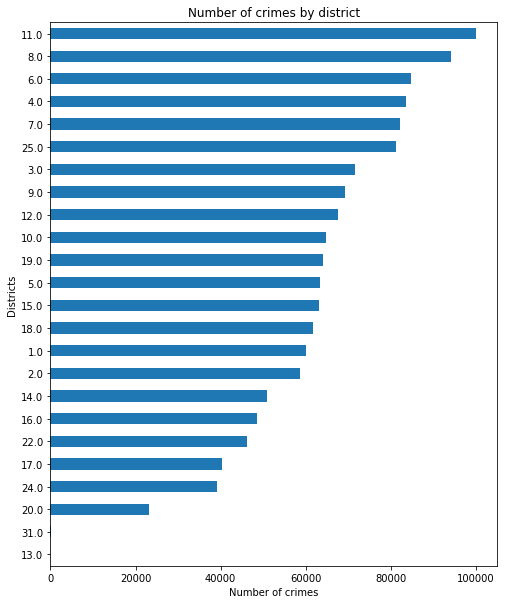

In [42]:
#Which district recorded most crimes and which district recorded the least?
plt.figure(figsize=(8,10))
df.groupby([df["District"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Districts')
plt.title('Number of crimes by district')
plt.show()

The  District number 11 and 8 are the most unsafe followed by 6, 4, 7 and 25. <br/>
The safest district in Chicago are District number 13 and 31

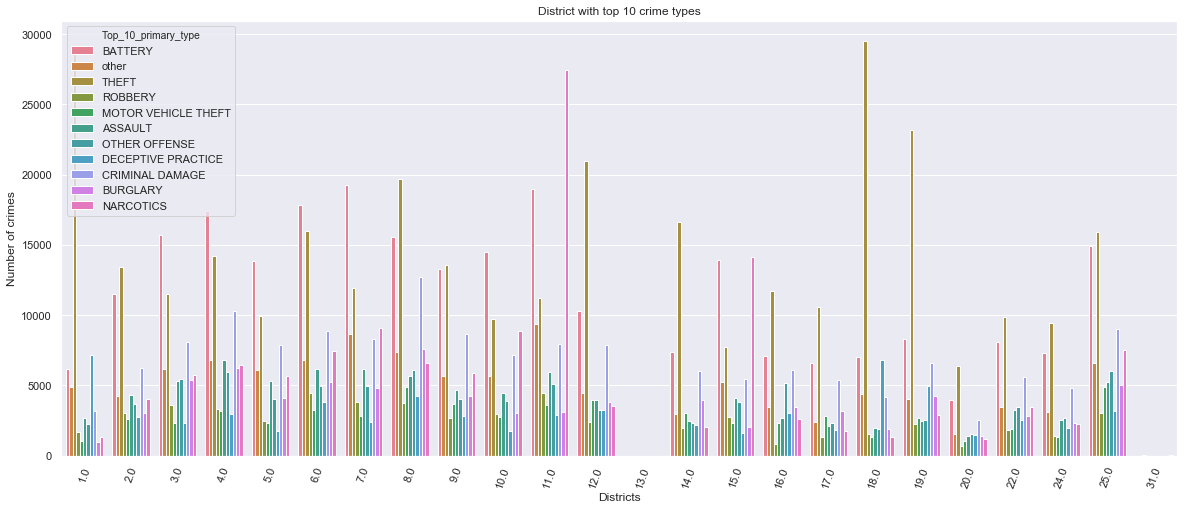

In [72]:
#for one district x ,Which is the most common crime in x?
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='District', hue='Top_10_primary_type', data=df,palette="husl")
plt.title("District with top 10 crime types")
plt.xlabel("Districts")
plt.ylabel("Number of crimes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

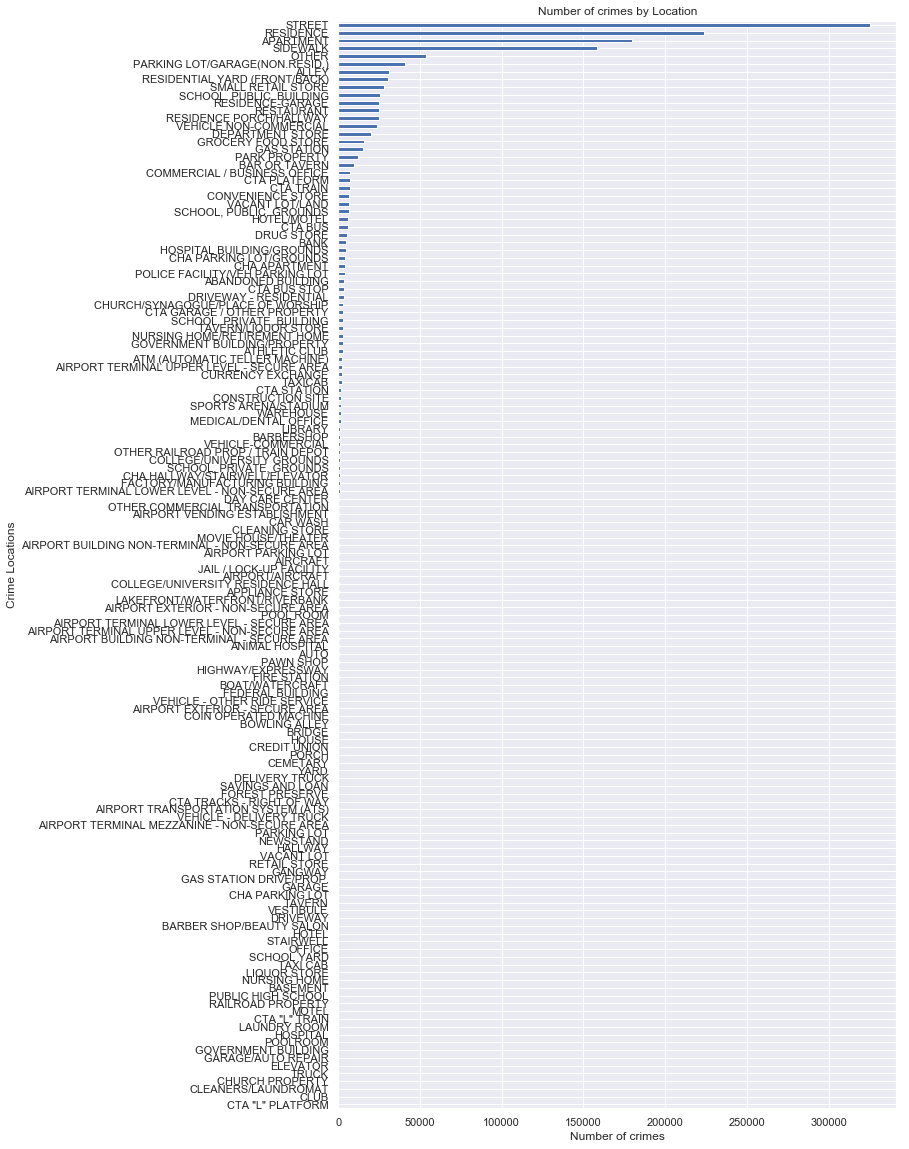

In [45]:
#Which Location recorded most crimes?
plt.figure(figsize=(10,20))
df.groupby([df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Locations')
plt.xlabel('Number of crimes')
plt.show()

The graphs tells us that most crimes happen on the STREET followed by RESIDENCE, in APARTMENTS or on SIDEWALKS. Again we can see that many Location Descriptions have very few data points and hence can be removed.

In [60]:
location_description=df.groupby([df['Location Description']]).size().sort_values(ascending=True)

location_description=location_description[-20:]
df["Top_20_location_description"]=df["Location Description"].map(lambda x: x if x in location_description else "OTHER")
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Updated On,Latitude,Longitude,Location,Time slice,Top_10_primary_type,Top_10_location_description,Top_60_location_description,Top_30_location_description,Top_20_location_description
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",Night,BATTERY,APARTMENT,APARTMENT,APARTMENT,APARTMENT
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Evening,BATTERY,RESIDENCE,RESIDENCE,RESIDENCE,RESIDENCE
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Night,other,STREET,STREET,STREET,STREET
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Evening,BATTERY,SIDEWALK,SIDEWALK,SIDEWALK,SIDEWALK
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Evening,THEFT,RESIDENCE,RESIDENCE,RESIDENCE,RESIDENCE


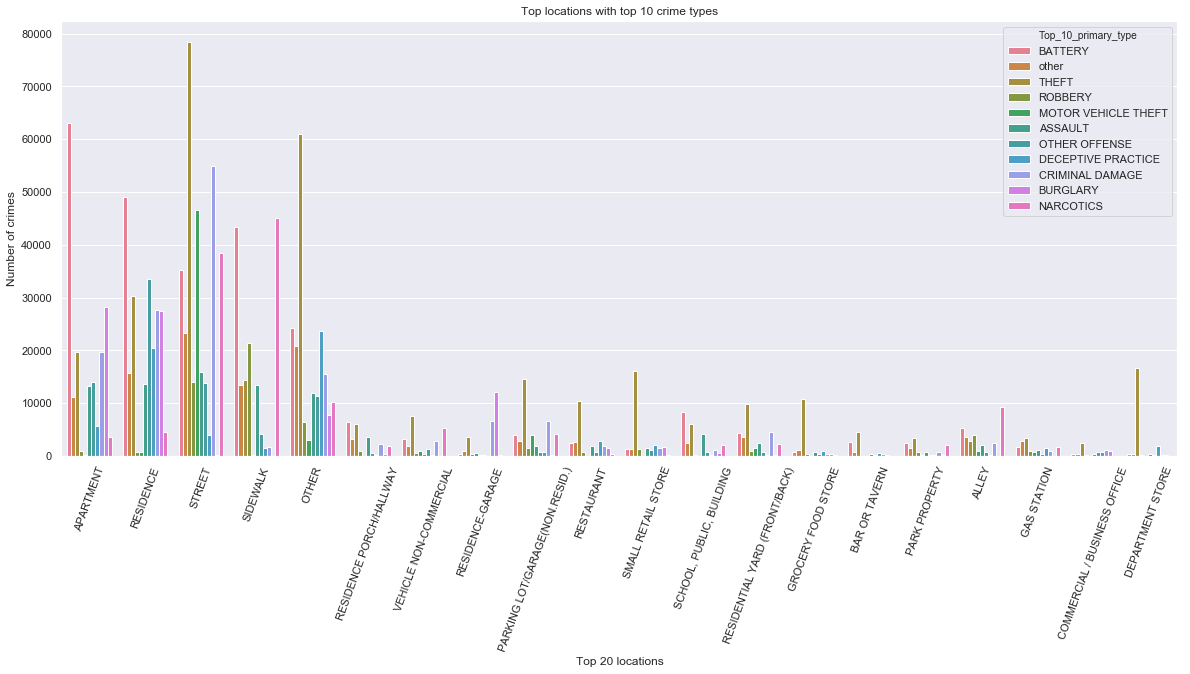

In [73]:
#for one location x ,Which is the most common crime in x?
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Top_20_location_description', hue='Top_10_primary_type', data=df,palette="husl")
plt.title("Top locations with top 10 crime types")
plt.xlabel("Top 20 locations")
plt.ylabel("Number of crimes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Text(0.5, 0, 'Arrest')

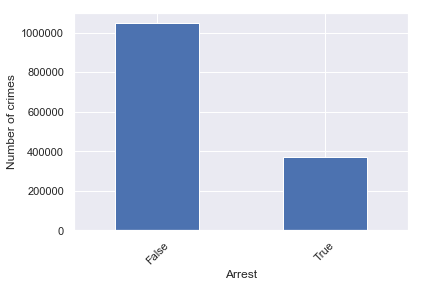

In [46]:
arrest=df["Arrest"].value_counts()
arrest.plot.bar(rot=45)
plt.ylabel("Number of crimes")
plt.xlabel("Arrest")

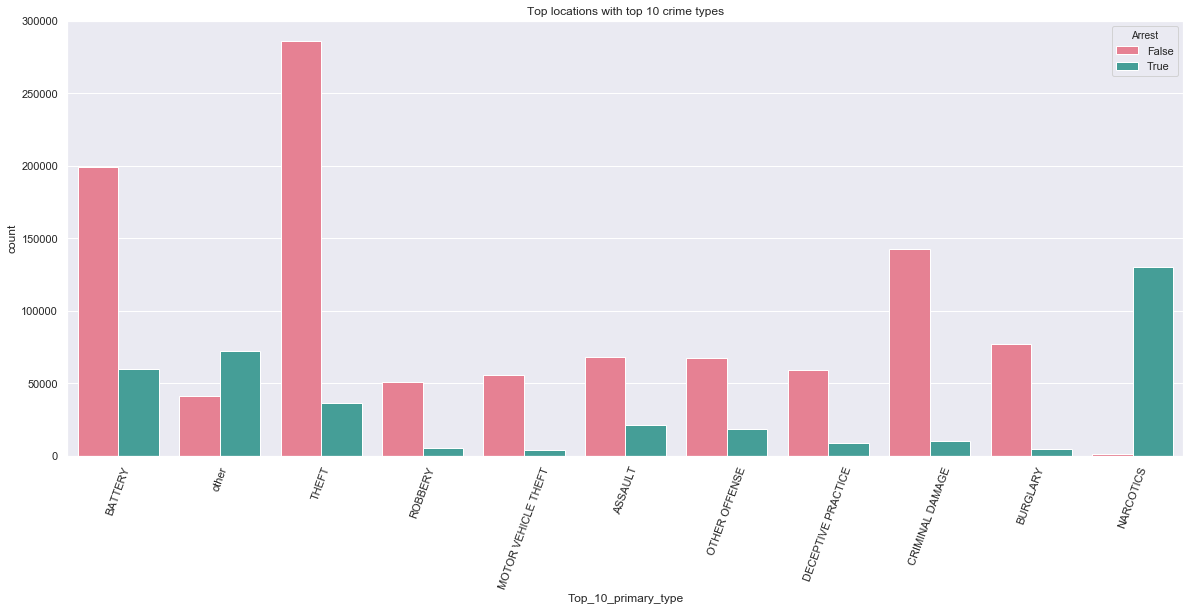

In [65]:
#which most crime type the police arrest
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Top_10_primary_type', hue='Arrest', data=df,palette="husl")
plt.title("Top locations with top 10 crime types")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);